# Experiment No: 8 : Image Segmentation : REGION GROWING

Aim: <br>
1.	To perform image segmentation using region growing. Take center of the image as seed point. Display the resultant image.<br>
2.	Change the seed point and observe its effect on the  resulting segmented image


Theory: <br>
The key of region based segmentation method is to define a consistency in grey levels. It is used to judge whether two adjacent regions can be merged. If two adjacent pixels are consistent (i.e. their difference is below a threshold value) then the two regions will be merged until we can't merge. <br>

The method of region growth is to select a seed point on the image, record the gray value of the point.

The gray value of each pixel of the image is subtracted from the adjacent pixel (or mean of the region) and checked if the result is less than the threshold, If yes, merge the point with the seed point, else, keep the gray value of the pixel unchanged.

The processed image is the edge segmented image processed by the region segmentation method .

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#import sys

# Example 1: Perform region growing on the given image  <br>
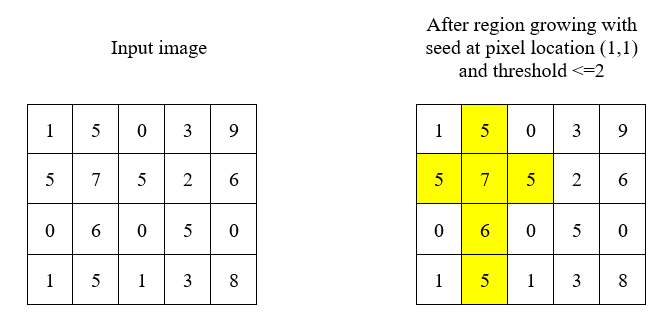

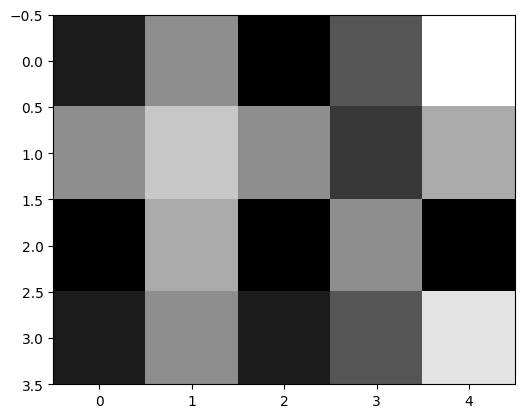

9


In [ ]:
image=np.array([[1,5,0,3,9],[5,7,5,2,6],[0,6,0,5,0],[1,5,1,3,8]],dtype=int)
mx=np.max(np.max(image))
plt.imshow(image,cmap='gray')
plt.show()
print(mx)

Develop a function to perform region growing

In [ ]:
def distance(a,b):
  return np.abs(a-b)

def region_growing(img, img_g, thresh, seed):
  x=seed[0]
  y=seed[1]
  img_g[x,y]=1
  [rows,cols]=img.shape
  #calculate the region mean

  px=img[x,y]


  if (y+1<cols and img_g[x,y+1]==0 and distance(px,img[x,y+1]) <=thresh):
    region_growing(img,img_g,thresh,[x,y+1])
  if (y-1>=0 and img_g[x,y-1]==0 and distance(px,img[x,y-1]) <=thresh):
    region_growing(img,img_g,thresh,[x,y-1])
  if (x+1<rows and img_g[x+1,y]==0 and distance(px,img[x+1,y]) <=thresh):
    region_growing(img,img_g,thresh,[x+1,y])
  if (x-1>=0 and img_g[x-1,y]==0 and distance(px,img[x-1,y]) <=thresh):
    region_growing(img,img_g,thresh,[x-1,y])

Perform region growing on the above input image and display the output

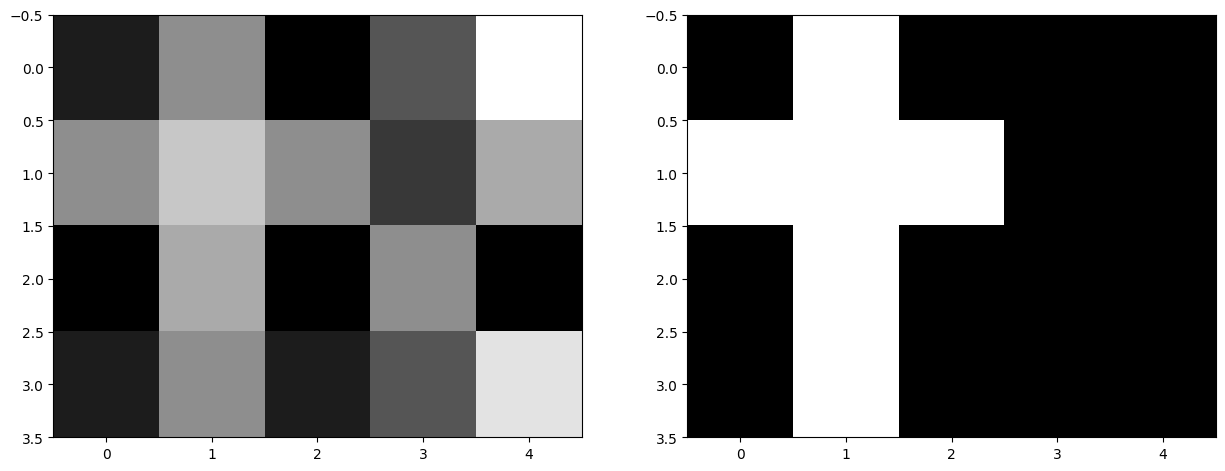

In [ ]:
#create an image of zeros of same shape as the image for storing the output values (img_out)
# this is the image/ array that we will go on filling with 1's if the difference between the neighbouring pixel and mean of region is less than threshold
img_seg=np.zeros(image.shape)

region_growing(image, img_seg, 2, [1,1])

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image,cmap='gray')
plt.subplot(122)
plt.imshow(img_seg,cmap='gray')
plt.show()


<Figure size 640x480 with 0 Axes>

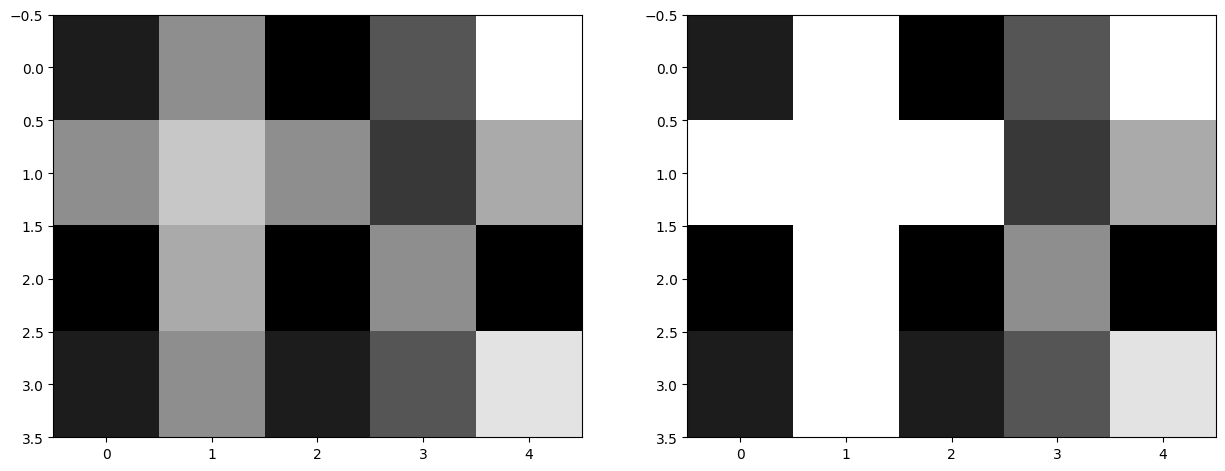

In [ ]:
image_modi=image.copy()
plt.figure()
for r in range(4):
  for c in range (5):
    if img_seg[r,c]==1:
       image_modi[r,c]=mx
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image,cmap='gray')
plt.subplot(122)
plt.imshow(image_modi,cmap='gray')

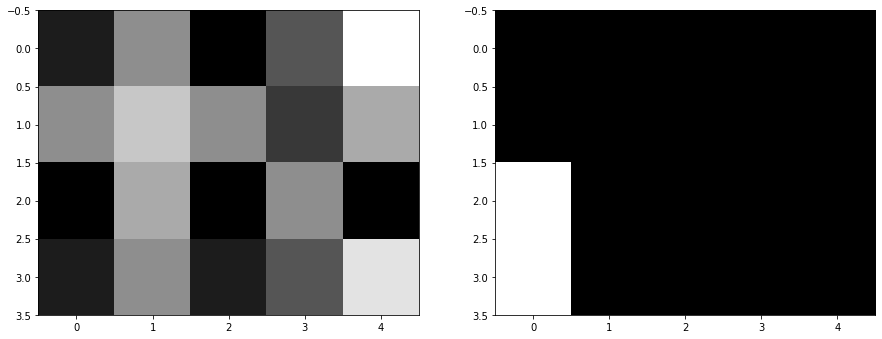

In [ ]:
# new seed
img_seg=np.zeros(image.shape)

region_growing(image, img_seg, 2, [3,0])

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image,cmap='gray')
plt.subplot(122)
plt.imshow(img_seg,cmap='gray')

<Figure size 432x288 with 0 Axes>

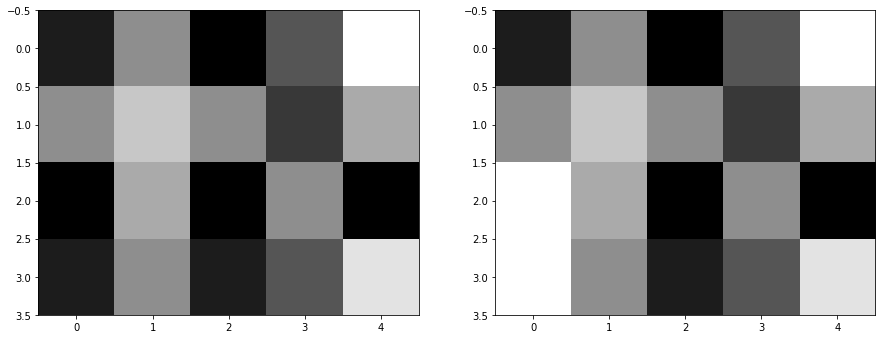

In [ ]:
image_modi=image.copy()
plt.figure()
for r in range(4):
  for c in range (5):
    if img_seg[r,c]==1:
       image_modi[r,c]=mx
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image,cmap='gray')
plt.subplot(122)
plt.imshow(image_modi,cmap='gray')

Observe the effect of changing the seed value on the output image and write your comments



Comment:

Example 2: Perform region growing on the given image <br>
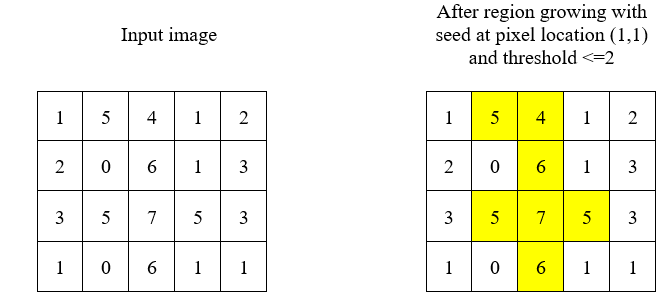

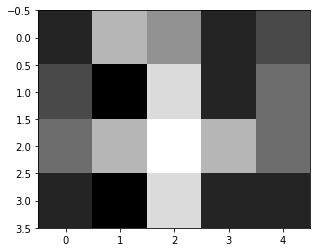

In [ ]:
image=np.array([[1,5,4, 1, 2],[2,0,6,1,3],[3,5,7,5,3],[1,0,6,1,1]],dtype=int)
plt.imshow(image,cmap='gray')
plt.show()

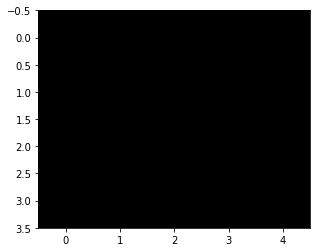

In [ ]:
img_seg=np.zeros(image.shape)
region_growing(image, img_seg, 2, [0,1])
plt.imshow(img_seg,cmap='gray')

In [ ]:
from skimage import io
from skimage.color import rgb2gray

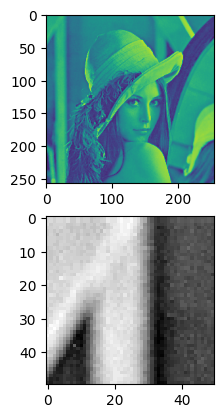

In [ ]:
image=io.imread('/content/8-bit-256-x-256-Grayscale-Lena-Image.png')
image=255*rgb2gray(image)
plt.subplot(211)
plt.imshow(image)
image=image[0:50,0:50]
plt.subplot(212)
plt.imshow(image, cmap='gray')

In [ ]:
mx=np.max(np.max(image))
mx=int(mx)
mx

177

In [ ]:
[rows, cols]= image.shape

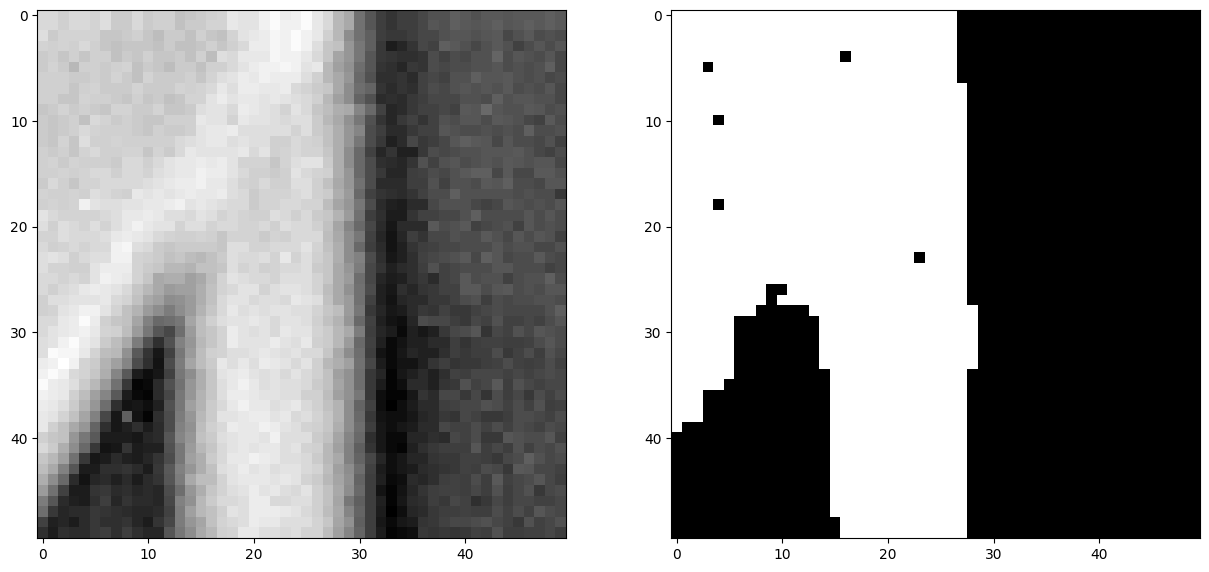

In [ ]:
img_seg=np.zeros(image.shape)
#seed=[5,5]
seed=[5,10]
thresh=5
region_growing(image, img_seg, thresh, seed)
img_seg=img_seg*255

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image,cmap='gray')
plt.subplot(122)
plt.imshow(img_seg,cmap='gray')

<Figure size 640x480 with 0 Axes>

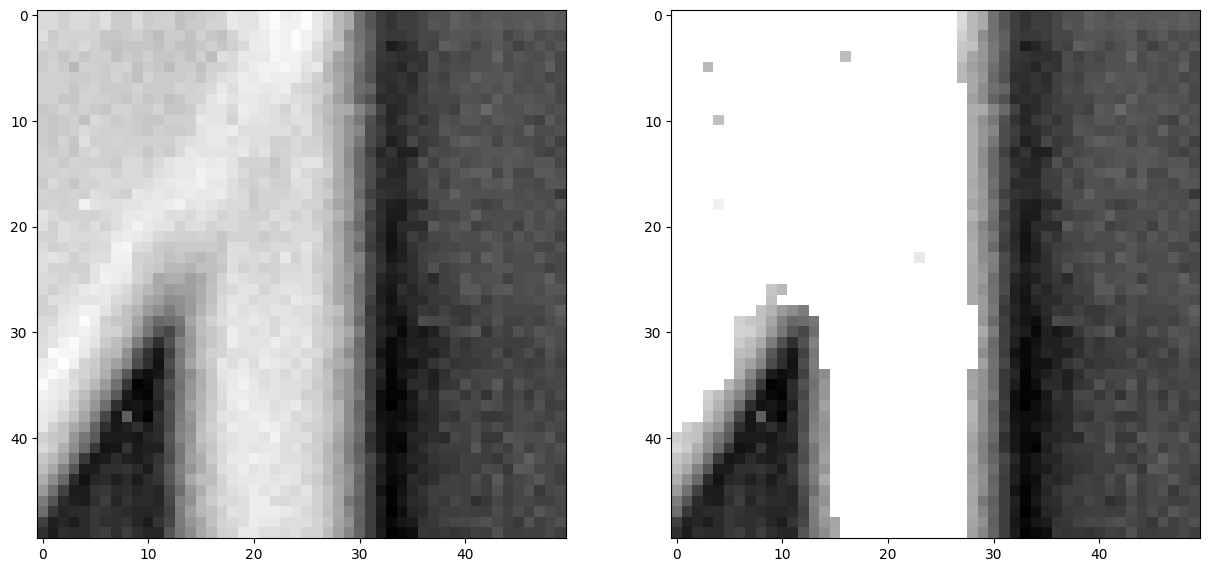

In [ ]:
img_modi=image.copy()
plt.figure()
for r in range(rows):
  for c in range (cols):
    if img_seg[r,c]==255.0:
       img_modi[r,c]=mx
    else:
      img_modi[r,c]=image[r,c]

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image,cmap='gray')
plt.subplot(122)
plt.imshow(img_modi,cmap='gray')

# Conclusion :